In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fake dataset with Pandas

In [21]:
N = 1_00_000

category = np.random.randint(0, 5, N)


fake = pd.DataFrame({"cat": category})
fake["txt"] = fake["cat"].map(dict(zip(range(5), list("abcde"))))
fake.head()

,cat,txt
0,0,a
1,0,a
2,0,a
3,0,a
4,4,e


In [33]:
def custom_blob(cat_val, N):
    return np.random.normal(10 * cat_val, 1 + 2 * cat_val, 1)[0]


def custom_blob2(cat_val):
    return np.random.normal(5 * cat_val, 1 + 0.5 * cat_val, 1)[0]


fake["num"] = fake["cat"].apply(custom_blob, args=[N])
fake["num2"] = fake["cat"].apply(custom_blob2)

In [38]:
fake.head()

,cat,txt,num,num2,colors
0,0,a,-0.998691,-0.574268,red
1,0,a,0.171538,-1.081637,red
2,0,a,2.170996,0.106818,red
3,0,a,-0.031887,1.114937,red
4,4,e,63.554688,17.827972,cyan


In [41]:
dict_colors = dict(zip(list("abcde"), ["red", "green", "blue", "purple", "cyan"]))


fake["colors"] = fake["txt"].map(dict_colors)

fake.head()

,cat,txt,num,num2,colors
0,0,a,-0.998691,-0.574268,red
1,0,a,0.171538,-1.081637,red
2,0,a,2.170996,0.106818,red
3,0,a,-0.031887,1.114937,red
4,4,e,63.554688,17.827972,cyan


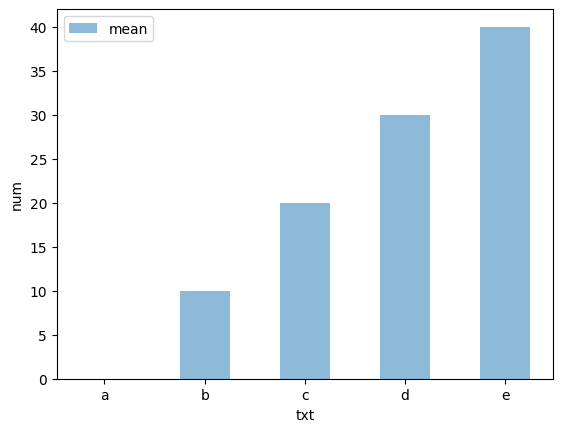

In [ ]:
GB = fake.loc[:, ["txt", "num"]].groupby("txt").mean().round(3)


fig, ax = plt.subplots()

plt.bar(x=GB.index, height=GB.num, alpha=0.5, width=0.5, label="mean")

plt.xlabel("txt")
plt.ylabel("num")

plt.legend()
plt.show()

# Seaborn

https://seaborn.pydata.org/tutorial.html
  
https://seaborn.pydata.org/examples/index.html

In [8]:
import seaborn as sns

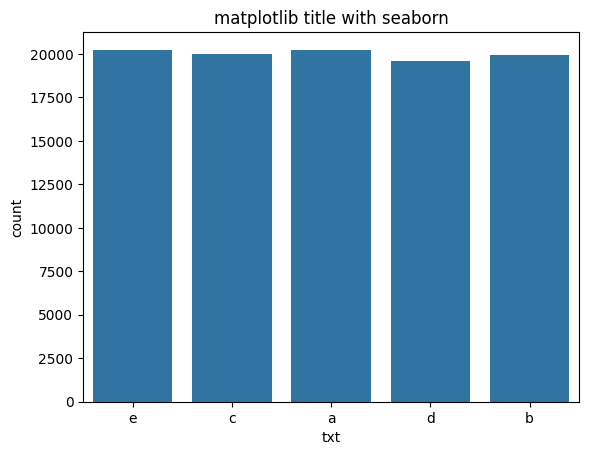

In [ ]:
# countplot = barplot + count
sns.countplot(data=fake, x="txt")
# (data = fake, x = fake['txt'])
plt.title("matplotlib title with seaborn")
plt.show()

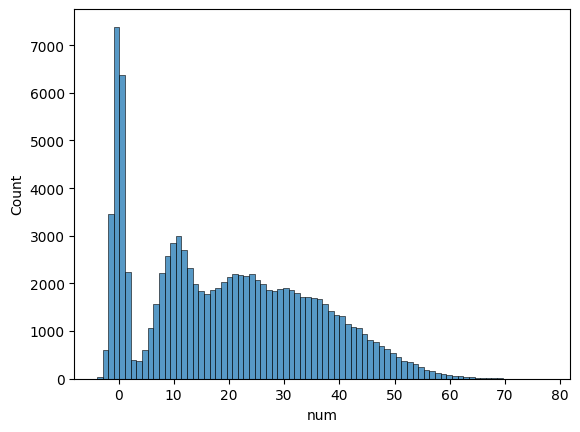

In [ ]:
sns.histplot(fake, x="num")
plt.show()

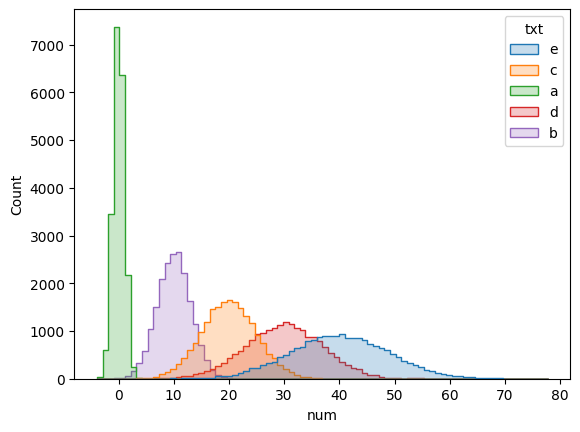

In [ ]:
sns.histplot(fake, x="num", hue="txt", element="step")
# hue == teinte == couleur
plt.show()

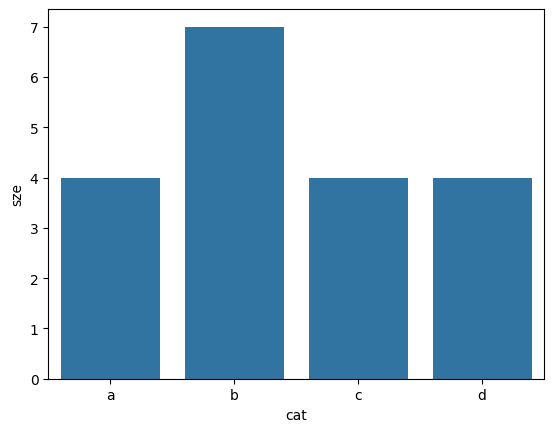

In [ ]:
### creation data

cat = list("abcd")
sze = np.random.randint(2, 8, 4)

GB = pd.DataFrame({"cat": cat, "sze": sze})

sns.barplot(data=GB, x="cat", y="sze")
plt.show()

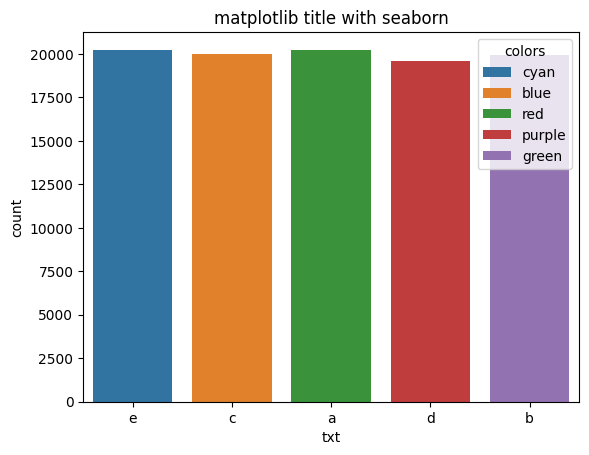

In [ ]:
# countplot = barplot + count
sns.countplot(data=fake, x="txt", hue="colors")
# (data = fake, x = fake['txt'])
plt.title("matplotlib title with seaborn")
plt.show()

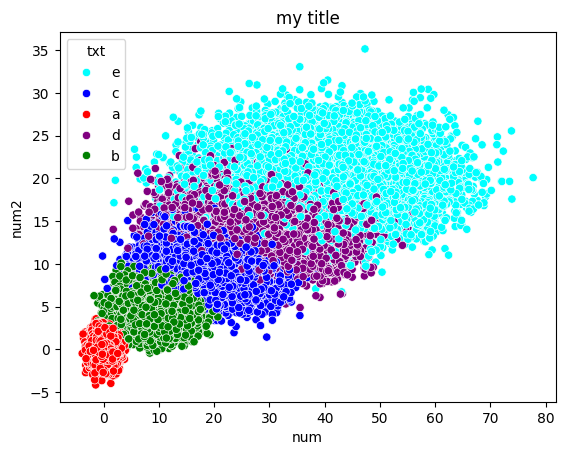

In [ ]:
dict_colors = dict(zip(list("abcde"), ["red", "green", "blue", "purple", "cyan"]))

sns.scatterplot(data=fake, x="num", y="num2", hue="txt", palette=dict_colors)
plt.title("my title")
plt.show()

In [15]:
# pas de pie-chart dans seaborn

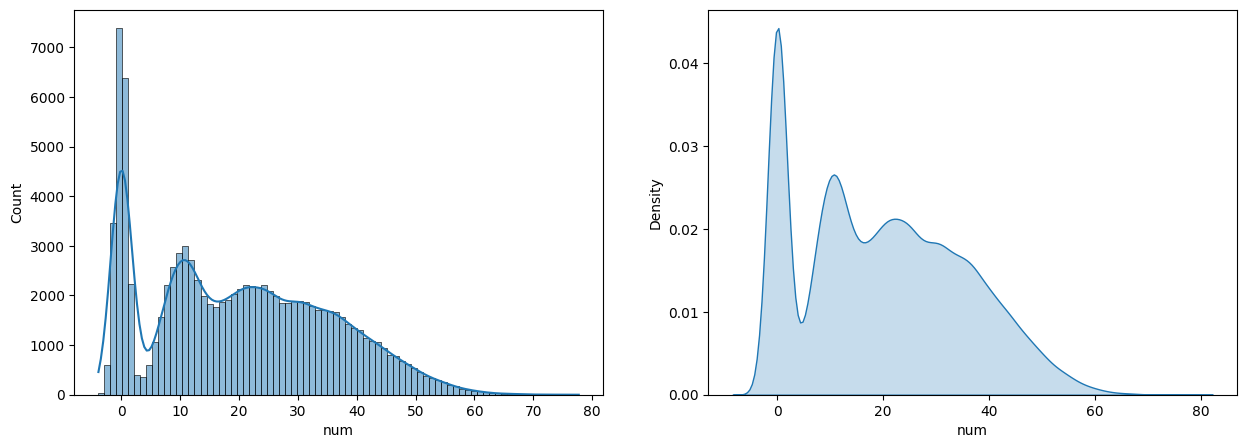

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)

sns.histplot(data=fake, x="num", kde=True)


plt.subplot(1, 2, 2)

sns.kdeplot(
    data=fake, x="num", fill=True
)  ## kernel density estimator = histogramme lissé

plt.show()

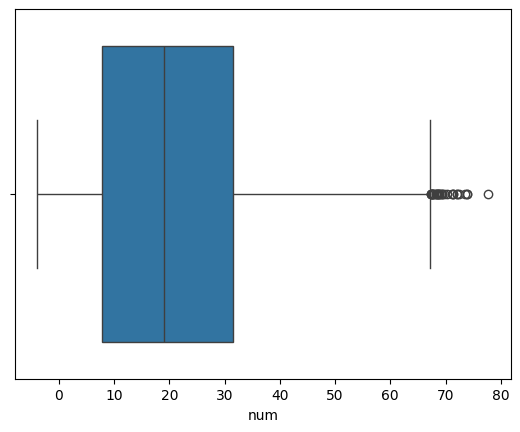

In [ ]:
sns.boxplot(
    data=fake, x="num"
)  ## boite à moustache: affiche la médiane ainsi que Q1 et Q3 (voir statistiques)
plt.show()


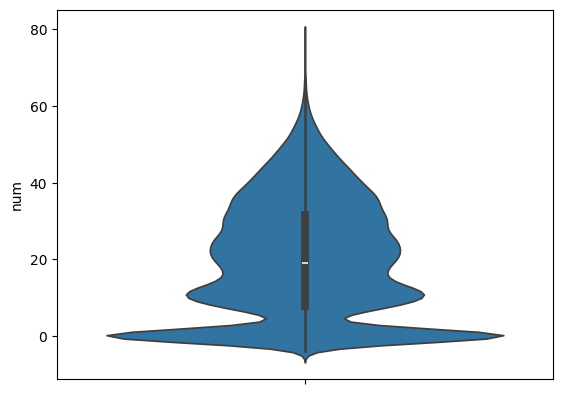

In [ ]:
### combinaison d'un 'boxplot' et kde/histogram (=rotation 90 degrées)
sns.violinplot(
    data=fake,
    y="num",
)
plt.show()

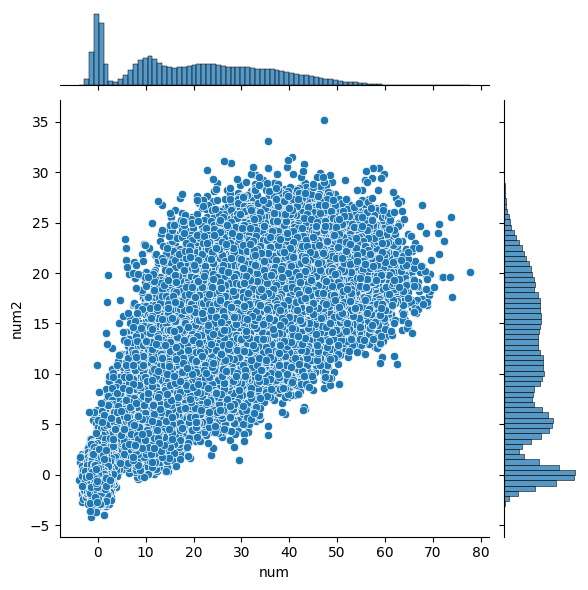

In [ ]:
sns.jointplot(data=fake, x="num", y="num2")
plt.show()